# MST Parser

In [ ]:
import random
import nltk
from nltk.corpus import dependency_treebank
import numpy as np
import random

Use the NLTK toolkit for importing the dependency_treebank (using the commands: nltk.download()

In [ ]:
nltk.download('dependency_treebank')

[nltk_data] Downloading package dependency_treebank to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/dependency_treebank.zip.


True

Load the parsed sentences of the corpus (given by dependency_treebank.parsed_sents()). 

In [ ]:
sen = dependency_treebank.parsed_sents()

Get words from the first sentence, and their (head,tail)

In [ ]:
for i, tree in enumerate(sen[:1]):
  values = tree.nodes.values()
  for val in values :
    head , tail, word, tag = val['head'],val['address'],val['word'],val['tag']
    print('head : ', head ,', tail : ' ,tail, ', word : ' , word,', tag : ' , tag )

head :  None , tail :  0 , word :  None , tag :  TOP
head :  2 , tail :  1 , word :  Pierre , tag :  NNP
head :  8 , tail :  2 , word :  Vinken , tag :  NNP
head :  0 , tail :  8 , word :  will , tag :  MD
head :  2 , tail :  3 , word :  , , tag :  ,
head :  5 , tail :  4 , word :  61 , tag :  CD
head :  6 , tail :  5 , word :  years , tag :  NNS
head :  2 , tail :  6 , word :  old , tag :  JJ
head :  2 , tail :  7 , word :  , , tag :  ,
head :  8 , tail :  9 , word :  join , tag :  VB
head :  11 , tail :  10 , word :  the , tag :  DT
head :  9 , tail :  11 , word :  board , tag :  NN
head :  9 , tail :  12 , word :  as , tag :  IN
head :  15 , tail :  13 , word :  a , tag :  DT
head :  12 , tail :  15 , word :  director , tag :  NN
head :  15 , tail :  14 , word :  nonexecutive , tag :  JJ
head :  9 , tail :  16 , word :  Nov. , tag :  NNP
head :  16 , tail :  17 , word :  29 , tag :  CD
head :  8 , tail :  18 , word :  . , tag :  .
head :  None , tail :  None , word :  None , tag :  

Then, divide the obtained corpus into training set and test set
such that the test set is formed by the last 10% of the sentences.

In [ ]:
num_of_sen = len(sen)
cut_by = int(num_of_sen*0.9)
training_set = sen[:cut_by]
test_set = sen[cut_by:]

In [ ]:
print('Number of sentences in training set is ',len(training_set))
print('Number of sentences in test set is ',len(test_set))

Number of sentences in training set is  3522
Number of sentences in test set is  392


In [ ]:
print(test_set[0])

defaultdict(<function DependencyGraph.__init__.<locals>.<lambda> at 0x7f362fa1c510>,
            {0: {'address': 0,
                 'ctag': 'TOP',
                 'deps': defaultdict(<class 'list'>, {'ROOT': [7]}),
                 'feats': None,
                 'head': None,
                 'lemma': None,
                 'rel': None,
                 'tag': 'TOP',
                 'word': None},
             1: {'address': 1,
                 'ctag': 'NNP',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '',
                 'head': 3,
                 'lemma': 'Kalamazoo',
                 'rel': '',
                 'tag': 'NNP',
                 'word': 'Kalamazoo'},
             2: {'address': 2,
                 'ctag': ',',
                 'deps': defaultdict(<class 'list'>, {}),
                 'feats': '',
                 'head': 3,
                 'lemma': ',',
                 'rel': '',
                 'tag': ',',
              

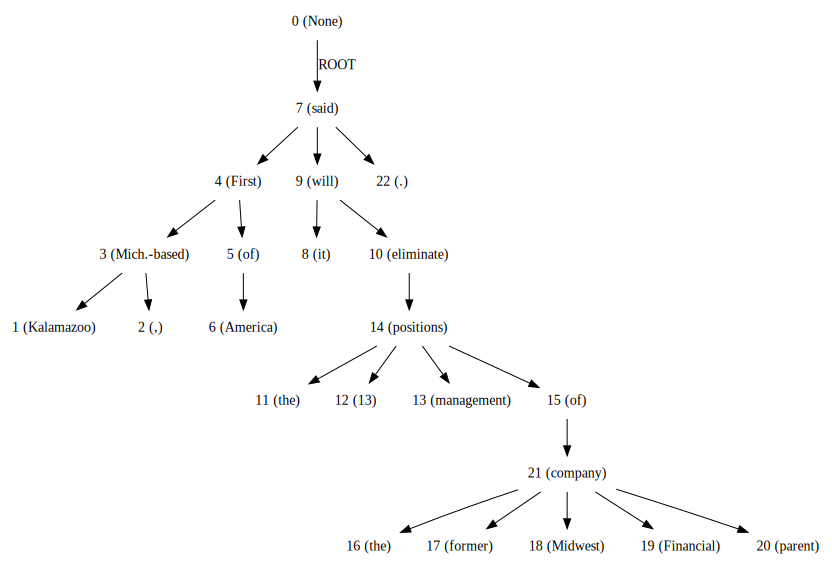

In [ ]:
test_set[0]

Use tagged sentences for defining sets and dictionaries

In [ ]:
tagged_sents = dependency_treebank.tagged_sents()
n = int(len(tagged_sents)*0.9)
print("Number of training samples is ", n)
print("Number of test samples is ",len(tagged_sents)-n )

Number of training samples is  3522
Number of test samples is  392


In [ ]:
def find_words_tags(tagged_sents):
  data = []
  labels = []
  for tagged_sent in tagged_sents:
    for word,tag in tagged_sent:
      data.append(word)
      labels.append(tag)
  return data,labels

In [ ]:
def create_lists(train_tagged_sents):
  sentences = []
  sentences_tags = []
  for tagged_sent in train_tagged_sents:
    sentence = []
    tags = []
    for word,tag in tagged_sent:
      sentence.append(word)
      tags.append(tag)
    sentences.append(sentence)
    sentences_tags.append(tags)
  return sentences,sentences_tags


In [ ]:
def find_all_possible_tags(tagged_sents):
  tags = []
  for tagged_sent in tagged_sents:
    for word,tag in tagged_sent:
      tags.append((tag))
  return tags

In [ ]:
train_tagged_sents = tagged_sents[:n]
test_tagged_sents = tagged_sents[n:]
sentences,sentences_tags = create_lists(train_tagged_sents)
test_sentences,test_sentences_tags = create_lists(test_tagged_sents)
x_train,y_train = find_words_tags(train_tagged_sents)
x_test,y_test = find_words_tags(test_tagged_sents)

In [ ]:
tags_set = set(y_train)
words_set = set(x_train)
all_tags = find_all_possible_tags(tagged_sents)
all_tags_set = set(all_tags)

In [ ]:
x , y = find_words_tags(tagged_sents)
all_words_set = set(x)

In [ ]:
print("Number of all possible words: ", len(all_words_set))
print("Number of all possible words in training set: ", len(words_set))
print("Number of all possible tags : ", len(all_tags_set))
print("Number of all tags in train set : ", len(tags_set))

Number of all possible words:  11968
Number of all possible words in training set:  11253
Number of all possible tags :  45
Number of all tags in train set :  45


## Building Dictionary

Those dictionaries will be used as an easy way to find an index for a given word or for a given tag. It also can be used to find a word according to it's index.

In [ ]:
word2index = {}
word2index['ROOT'] = 0
for i,w in zip(range(1,len(words_set)+1),words_set):
  word2index[w] = i

index2word = {}
index2word[0] = 'ROOT'
for i,w in zip(range(1,len(words_set)+1),words_set):
  index2word[i] = w

tag2index = {}
tag2index['ROOT'] = 0
for j,t in zip(range(1,len(tags_set)+1),tags_set):
  tag2index[t] = j

## The feature function

Write a Boolean feature function f 
that encodes the following features:

• Word bigrams: For a potential edge between the nodes u,v in V , the feature function will have a feature for every pair of word forms (types) w,w', which has a value of 1 if the node u is the word w and the node v is the word w'.

• POS bigrams: For a potential edge between the nodes u,v in V , the feature function will have a feature for every pair of POS tags t,t', which has a value of 1 if the node u has the POS tag t and the node v has the POS tag t'.

Since the feature vectors might be very sparse, they can be represented by a  smaller amount of features. In our case we have a vector of size n^2 + t^2 where n is the number of all different words, and t is the number of all different tags. This vector consisnts zeros except for 2 entries, therefore we chsose to represent it by 2 integers : an integer that represent the words in an arc, and an integer for their matching tags. For this purpose we use 4 indexs - head index , tail index , head tag index , tail tag index.

In [ ]:
def index_word_pos_bigrams(sentence,sentence_tags,words_set,tags_set):
  """This function gets a list of words in a sentence , their tags ,a words set and
  a tags set. It gives each word an index according to it's location on the words set. 
  It also gives every word's tag an index according to it's location on the tags set.
  The function returns a list of words indexes, and a matching list of tags indexes."""
  word_ind_list = []
  pos_ind_list = []
  word_ind_list.append(word2index['ROOT'])
  pos_ind_list.append(tag2index['ROOT'])

  for w in sentence:
    word_ind_list.append(word2index[w])
  for t in sentence_tags:
    pos_ind_list.append(tag2index[t])
  return word_ind_list,pos_ind_list


## The Perceptron algorithm:



The scoring function is defined to be the dot product of the feature function by a weight vector w.

Implement the averaged perceptron algorithm for learning w from the training set. Use 2 iterations (i.e., two traversals over the examples) and a learning rate equal to 1. Traverse the training instances in a random order to avoid artefacts.

In [ ]:
def create_pair_list(ind_word_features,ind_pos_features):
  """ This function gets as input two list of indexes:
    1. a list of indexes of words in a sentence.
    2. a list of indexes of tags in a sentence.
    The function return a list of words indexes pairs, and a list of tags indexes
    pair. It finds all possible pairs of different items."""
  words_pairs = []
  pos_pairs = []
  for i_w, i_pos in zip(ind_word_features,ind_pos_features):
    for j_w, j_pos in zip(ind_word_features,ind_pos_features):
      # There cannot be an arc from node to root
      if j_w != 0 and i_w!=j_w:
        words_pairs.append([i_w,j_w])
        pos_pairs.append([i_pos,j_pos])
  return words_pairs,pos_pairs

In [ ]:
def update_weight(W,lr,true_words_arc, true_pos_arc, pred_words_arc , pred_pos_arc):
  """ This function is responssible to update the weigts vector by index.
  It performs substraction between the features function of the gold standart arcs
  and the features function of the predicted arcs. Since the featurs vectors are 
  binary, if the gold standart arc is the same as the predictied one no update is done.
  Otherwise, the substraction is done by adding 1 to the true arc's index on W, 
  and substraction 1 from the predicted arc's index on W. """
  if true_words_arc != pred_words_arc :
    W[true_words_arc] += (1 * lr)
    W[pred_words_arc] -= (1 * lr)
  if true_pos_arc != pred_pos_arc:
    W[true_pos_arc] += (1 * lr)
    W[pred_pos_arc] -= (1 * lr)   
  return W

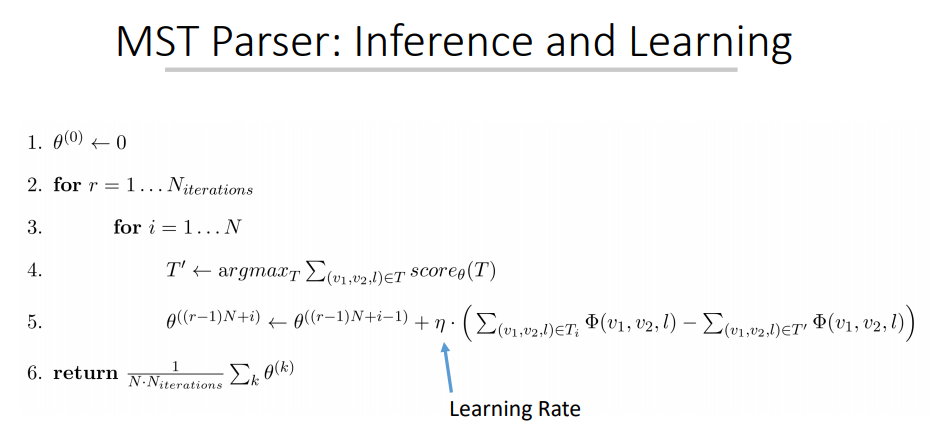

Eeach word in the sentence has an index according to it's location on the words set [1 - 11253].

The index 0 for both word and tag belongs to the root.

Each tag that matches the relevant word has an index according to it's location on the tags set [1 - 45]

In [ ]:
def Perceptron(sentences,sentences_tags,words_set,tags_set,iterations,lr,training_set):
  # Traverse the training instances in a random order
  to_shuffle = list(zip(sentences,sentences_tags, training_set))
  random.shuffle(to_shuffle)
  shuff_sentences,shuff_sentences_tags, shuff_training_set = zip(*to_shuffle)
  # add one more word and one more tag for ROOT
  num_of_words = len(words_set) + 1
  num_of_tags = len(tags_set) + 1
  # create list of learned weights
  W_list = []
  # initiaize the weights vector with zeros
  W = np.zeros(num_of_words**2 + num_of_tags**2 +1)
  for r in range(iterations):
    for i in range(len(sentences)):
      # create arcs list for each sentence
      arcs = []

      ind_word_features , ind_pos_features =  index_word_pos_bigrams(shuff_sentences[i] , shuff_sentences_tags[i],words_set,tags_set)
      # create pairs list of words and their pos
      words_pairs,pos_pairs = create_pair_list(ind_word_features,ind_pos_features)
      # for each pair of words 
      for (v,u) , (pos1,pos2) in zip(words_pairs,pos_pairs):
          # calculate the score by updating only the relevant indexes in the weights vector
          score = W[ v * num_of_words + u ] + W[pos1 * num_of_tags + num_of_words**2 + pos2] 
          # create an arc
          arc = namedtuple('arc', ['head', 'tail', 'weight'])
          # minus the score to get maximal spanning tree
          arc.weight = -score
          arc.head = v
          arc.tail = u
          arcs.append(arc)

      # find maximal spanning tree 
      T_min = min_spanning_arborescence_nx(arcs,0)

      # for each sentence create a dictionary from a word to it's tag
      sen_word2tag ={}
      sen_word2tag['ROOT'] = 'ROOT'
      for k in range(len(shuff_sentences[i])):
        word = shuff_sentences[i][k]
        tag = shuff_sentences_tags[i][k]
        sen_word2tag[word] = tag

      # travarse both trees to find the words of an arc and their tags
      for T_min_val,T_val  in zip(T_min.values(),shuff_training_set[i].nodes.values()):
        # get words indexes
        pred_v,pred_u = T_min_val.head,T_min_val.tail
        # get words
        v,u = index2word[pred_v],index2word[pred_u] 
        # get tags
        pred_v_tag,pred_u_tag = sen_word2tag[v],sen_word2tag[u] 
        # get tags indexes
        pred_v_tag,pred_u_tag = tag2index[pred_v_tag] , tag2index[pred_u_tag]

        # indexes that matches the weights vector
        pred_words_arc = pred_v * num_of_words + pred_u
        pred_pos_arc = pred_v_tag * num_of_tags + num_of_words**2 +  pred_u_tag

        # gold standart tree
        head , tail = T_val['head'],T_val['address']
        # check that the head node is not a root
        if head:
          head_word = shuff_sentences[i][head-1]
          true_head = word2index[head_word]
          head_tag = sen_word2tag[head_word]
          head_tag = tag2index[head_tag]

        # if the head is a root 
        if head == 0 :
          true_head = 0
          head_tag = 0

        # if the head node is None the tail is the root - we'll treat it as the 
        # arc between the root to the first word on the tree
        if head is None:
          true_head = 0
          head_tag = 0
          tail = (T_val['deps']['ROOT'])[0]
          
        tail_word = shuff_sentences[i][tail-1]
        true_tail = word2index[tail_word]
        tail_tag = sen_word2tag[tail_word]
        tail_tag = tag2index[tail_tag]

        true_words_arc = true_head * num_of_words + true_tail
        true_pos_arc = head_tag * num_of_tags + num_of_words**2 +  tail_tag

        W = update_weight(W,lr,true_words_arc, true_pos_arc, pred_words_arc , pred_pos_arc)

      W_list.append(W)
  sum_W =0
  for w in W_list:
    sum_W += w
  W_avg = sum_W/ (2*len(sentences))
  return W_avg
 

### Evaluate training

In [ ]:
def create_gold_standart(tree,sentence,to_check_root,toPrint,to_check_unknown_words):
  """ This function return a list of pairs indexes representing words in arcs of 
  the gold standart tree.
  Handaling the root on gold standart tree is done by checking:
  if head = 0 , than this arc is between the root to another word.
  The index of a tail word can be found by the dicitionary
  if head is None, than this arc is between None to the root."""
  true_arcs_lst = []
  for d in tree.nodes.values():
    head ,tail = d['head'],d['address']
    # arcs doesnt not has a root in it 
    if head and tail:
        v,u = sentence[head-1],sentence[tail-1]
        if toPrint:
          printif toPrint:
        # check unknown words that did not apeared in training set 
        if to_check_unknown_words :
          if v not in word2index : 
            v_index = -1
          if u not in word2index:
            u_index = -1 
          if v in word2index : 
            v_index = word2index[v]
          if u in word2index:
            u_index = word2index[u]
        else:
          if v in word2index:
            if u in word2index:
              v_index,u_index = word2index[v],word2index[u]
        true_arcs_lst.append([v_index,u_index ])
    # head is 0 - arc between root to the first word
    if not head and tail :
      u = sentence[tail-1]
      if toPrint:
        print('ROOT',u)
      if u in word2index:
        u_index = word2index[u] 
      else:
        if to_check_unknown_words:
          u_index = -1
      true_arcs_lst.append([0,u_index])
    # if we want to add the indexes of the root's arc.
    if to_check_root:
      if head is None :
          deps = d['deps']['ROOT']
          u_index = deps[0]
          true_arcs_lst.append([0,u_index-1])
          if toPrint:
            print('ROOT',sentence[u_index-1])
      
  return true_arcs_lst

In [ ]:
def create_predicted_arcs_list(T_min,toPrint):
  """This function returns a list of arcs indexes from the maximal spanning tree"""
  pred_arcs_lst =[]
  for k in T_min.values():
    pred_arcs_lst.append([k.head,k.tail])
    if toPrint:
      print(index2word[k.head] , index2word[k.tail])
  return pred_arcs_lst

In [ ]:
def calculate_accuracy(true_arcs_lst,pred_arcs_lst,toPrint):
  """This function calculates the accuracy by counting the number of shared arcs
  between the gold standart tree and the maximal spanning tree"""
  correct = 0
  for v,u in true_arcs_lst:
    if [v,u] in pred_arcs_lst:
      if toPrint:
        print(index2word[v],index2word[u])
      correct += 1
  return correct / len(true_arcs_lst)

In [ ]:
def eval_training(weight_res):
  """This function calculates average accuracy of 100 sentences from the
   training set with the learned weights"""
  train_avg_accuracy = 0
  num_of_words = len(words_set) + 1
  num_of_tags = len(tags_set) + 1
  for m in range(100):
    train_arcs = []
    train_ind_word_features,train_ind_pos_features =  index_word_pos_bigrams(sentences[m],sentences_tags[m],words_set,tags_set)
    train_words_pairs,train_pos_pairs = create_pair_list(train_ind_word_features,train_ind_pos_features)

    for (v,u) , (pos1,pos2) in zip(train_words_pairs,train_pos_pairs):
      # The scoring function is defined to be the dot product of the feature function by a weight vector w.
      score = weight_res[ v*num_of_words + u ] + weight_res[pos1 * num_of_tags + num_of_words**2 + pos2] 
      train_arc = namedtuple('arc', ['head', 'tail', 'weight'])

      # minus the score to get maximal spanning tree
      train_arc.weight = -score
      train_arc.head = v
      train_arc.tail = u
      train_arcs.append(train_arc)
    # find maximal spanning tree 
    T_max_train = min_spanning_arborescence_nx(train_arcs,0)
    train_gold_standart = create_gold_standart(training_set[m],sentences[m],True,False,True)
    train_predicted_arcs = create_predicted_arcs_list(T_max_train,False)
    train_accuracy = calculate_accuracy(train_gold_standart,train_predicted_arcs,False)
    train_avg_accuracy += train_accuracy
  train_avg_accuracy = train_avg_accuracy / 100
  return train_avg_accuracy,T_max_train,m

Evaluate 100 sentences from training set results average accuracy is : 0.519


In [ ]:
train_avg_accuracy,T_max_train,m = train_avg_accuracy, T_max_train,index_of_sen = eval_training(check_root_res)

In [ ]:
train_avg_accuracy

0.5195980049841381

#### Example of one sentence

In [ ]:
pred = create_predicted_arcs_list(T_max_train,True)

ROOT underscore
Plans that
that give
that have
give maintaining
give .
advertisers ad
advertisers competition
discounts for
maintaining or
maintaining increasing
maintaining spending
or discounts
increasing at
ad Plans
ad the
ad B.
ad Zuckerman
ad World
have News
become fixtures
become between
become advertisers
permanent become
at weeklies
at Inc.
weeklies news
underscore permanent
competition fierce
between Report
Inc. ,
Inc. &
's Newsweek
's Warner
's magazine
's Mortimer
's U.S.
magazine Time
Report and
Report 's


In [ ]:
gold_stand = create_gold_standart(training_set[m],sentences[m],True,True,True)

ROOT have
have Plans
Plans that
that give
give advertisers
give discounts
discounts for
for maintaining
maintaining or
maintaining increasing
spending ad
maintaining spending
have become
fixtures permanent
become fixtures
fixtures at
weeklies the
at weeklies
weeklies news
have and
have underscore
competition the
underscore competition
competition fierce
competition between
Report Newsweek
between Report
Report ,
's Time
magazine 's
's Warner
's Inc.
Report magazine
magazine Time
Report ,
Report and
's Mortimer
Report 's
's B.
's Zuckerman
Report U.S.
Report News
Report &
Report World
have .


Print the shared arcs of gold standart tree and predicted tree

In [ ]:
calculate_accuracy(gold_stand,pred,True)

Plans that
that give
discounts for
maintaining or
maintaining increasing
maintaining spending
become fixtures
at weeklies
weeklies news
competition fierce
between Report
's Warner
magazine Time
Report and
's Mortimer
Report 's


0.34782608695652173

## Evaluation

Compute the (unlabeled) attachment score for the learned w (i.e., the number of edges shared by the predicted tree and the gold standard tree divided by the number of words; see lecturenotes), averaged over all sentences in the test set. Report your results in the pdf file.

In [ ]:
def index_word_pos_bigrams_test(sentence,sentence_tags,words_set,tags_set):
  word_ind_list = []
  pos_ind_list = []
  word_ind_list.append(word2index['ROOT'])
  pos_ind_list.append(tag2index['ROOT'])

  for w,t in zip(sentence,sentence_tags):
    if w in word2index:
      word_ind_list.append(word2index[w])
      pos_ind_list.append(tag2index[t])
  return word_ind_list,pos_ind_list

In [ ]:
def evaluate(W_avg,test_sentences,test_sentences_tags,test_set,to_check_root,to_check_unknown_words):
  avg_accuracy = 0
  acuuracy_lst = []
  num_of_words = len(words_set) + 1
  num_of_tags = len(tags_set) + 1
  for i in range(len(test_sentences)):
    test_arcs = []
    test_ind_word_features,test_ind_pos_features =  index_word_pos_bigrams_test(test_sentences[i],test_sentences_tags[i],words_set,tags_set)
    test_words_pairs,test_pos_pairs = create_pair_list(test_ind_word_features,test_ind_pos_features)

    for (v,u) , (pos1,pos2) in zip(test_words_pairs,test_pos_pairs):
      # The scoring function is defined to be the dot product of the feature function by a weight vector w.
      score = W_avg[ v*num_of_words + u ] + W_avg[pos1 * num_of_tags + num_of_words**2 + pos2] 
      test_arc = namedtuple('arc', ['head', 'tail', 'weight'])

      # minus the score to get maximal spanning tree
      test_arc.weight = -score
      test_arc.head = v
      test_arc.tail = u
      test_arcs.append(test_arc)
    # find maximal spanning tree 
    T_max_test = min_spanning_arborescence_nx(test_arcs,0)
    test_gold_standart = create_gold_standart(test_set[i],test_sentences[i],to_check_root,False,to_check_unknown_words)
    test_predicted_arcs = create_predicted_arcs_list(T_max_test,False)
    test_accuracy = calculate_accuracy(test_gold_standart,test_predicted_arcs,False)
    acuuracy_lst.append(test_accuracy)
    avg_accuracy += test_accuracy
  avg_accuracy = avg_accuracy / len(test_sentences)
  return avg_accuracy,acuuracy_lst

### Final results - accuracy is 0.301

Evaluate sentences from test set:

We tried different ways to deal with the root - we show the results for 3 different approach.

We chose the first apporach - map root nodes of arcs by checking if the head node is None or 0.
if the head node is None than this arc is the one that represents the root,
if the head node is 0 than this arc is from the root to the first word.
Else , we find the head index with dictionaries that maps index in sentence to word, and a word from the words set of training set to an index that will be updated in W.

Check root mean that we check if the arc (head = None,tail = 0) appears in the predicted tree. Logically that shouldn't apear in the predicted three, but we checked it anyway.

  The accuracy is:

  1. When root is defined by index 0 , and the word it connected to get's the relevant index

  No root: **0.301**

  Check root : 0.284
  
  2. When root's head and tail are defined by indexes 0 (ignoring the word that the root is connected to)

  No root: **0.267**

  Check root : 0.251

  3. When only root's head is defined by indexes 0, without checking if head is None

  No root: **0.2799**

  Check root : 0.263


1. When root is defined by index 0 , and the word it connected to get's the relevant index

Without adding the arc of the root, only the arc from the root to the first word

In [ ]:
check_root_res = Perceptron(sentences,sentences_tags,words_set,tags_set,2,1,training_set)

In [ ]:
check_avg_accuracy,check_acuuracy_lst = evaluate(check_root_res,test_sentences,test_sentences_tags,test_set,False,True)

In [ ]:
check_avg_accuracy

0.30118457046490127

Adding the arc of the root, in addition to the arc from the root to the first word

In [ ]:
check_root_avg_accuracy,check_root_acuuracy_lst = evaluate(check_root_res,test_sentences,test_sentences_tags,test_set,True,True)

In [ ]:
check_root_avg_accuracy

0.2840535998714771

2. When we have a root node we define : 

          true_head = 0
          head_tag = 0
          true_tail = 0
          tail_tag = 0

In [ ]:
result = Perceptron(sentences,sentences_tags,words_set,tags_set,2,1,training_set)

Not taking the arc of (None,0)

In [ ]:
res_avg_accuracy,res_acuuracy_lst = evaluate(result,test_sentences,test_sentences_tags,test_set,True)

In [ ]:
res_avg_accuracy

0.25163937945144926

Taking the arc of (None,0)

In [ ]:
res_avg_accuracy,res_acuuracy_lst = evaluate(result,test_sentences,test_sentences_tags,test_set,False)

In [ ]:
res_avg_accuracy

0.2668187039734554

3. When we have a root node we define : 

          true_head = 0
          head_tag = 0


Not taking the arc of (None,0)

In [ ]:
weight_res = Perceptron(sentences,sentences_tags,words_set,tags_set,2,1,training_set)

In [ ]:
avg_accuracy,acuuracy_lst = evaluate(weight_res,test_sentences,test_sentences_tags,test_set,False)

In [ ]:
avg_accuracy

0.2799387739859107

Taking the arc of (None,0)

In [ ]:
avg_accuracy,acuuracy_lst = evaluate(weight_res,test_sentences,test_sentences_tags,test_set,True)

In [ ]:
avg_accuracy

0.26352817276333607

unknown words are counted when calculating accuracy

In [ ]:
avg_accuracy

0.2578687933173694

Not taking the unknown words 

In [ ]:
avg_accuracy

0.3160655540892543

# Chu_Liu_Edmonds_algorithm

minimum_spanning_arborescence returns a minimum spanning arborescence from G.

Parameters:	
G ((multi)digraph-like) – The graph to be searched.

attr (str) – The edge attribute used to in determining optimality.

default (float) – The value of the edge attribute used if an edge does not have the attribute attr.

Returns:	
B – A minimum spanning arborescence.

Return type:	
(multi)digraph-like

A maximum spanning tree is a spanning tree of a weighted graph having maximum weight. It can be computed by negating the weights for each edge

In [ ]:
from collections import defaultdict, namedtuple
from networkx import DiGraph
from networkx.algorithms import minimum_spanning_arborescence


def min_spanning_arborescence_nx(arcs, sink):
    """
    Wrapper for the networkX min_spanning_tree to follow the original API
    :param arcs: list of Arc tuples
    :param sink: unused argument. We assume that 0 is the only possible root over the set of edges given to
     the algorithm.
    """
    G = DiGraph()
    for arc in arcs:
        G.add_edge(arc.head, arc.tail, weight=arc.weight)
    ARB = minimum_spanning_arborescence(G)
    result = {}
    headtail2arc = {(a.head, a.tail): a for a in arcs}
    for edge in ARB.edges:
        tail = edge[1]
        result[tail] = headtail2arc[(edge[0], edge[1])]
    return result